## Import Libraries

In [2]:
!pip install category_encoders
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from scipy.stats import skew
import statsmodels.api as sm
import re
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.formula.api import ols

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

--color customization and funcion or else

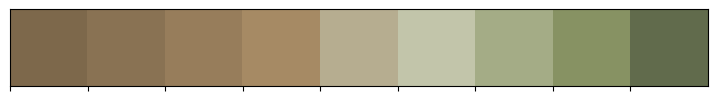

In [5]:
fall = ['#7d684b', '#897253', '#977d5b', '#a68a64', '#b6ad90', '#c2c5aa', '#a4ac86', '#879263', '#616b4c']
fall_random = ['#7d684b', '#879263', '#897253', '#616b4c','#977d5b', '#a4ac86', '#a68a64', '#c2c5aa', '#b6ad90']
fall_map = ListedColormap(fall)
fall_rand = sns.color_palette(fall_random)
fall_palette = sns.color_palette(fall)
sns.palplot(fall_palette)

In [6]:
#mhmd's function

def dataInfo(data):

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df.style.background_gradient(cmap=fall_map)

## Explore Dataset

In [7]:
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
df.head().style.background_gradient(cmap=fall_map)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.150000,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.650000,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650000,820.500000,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800000,3046.050000,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.700000,5036.300000,Yes,1,89,5340,Competitor had better devices


In [8]:
df.tail().style.background_gradient(cmap=fall_map)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.150000,1419.400000,No,0,45,5306,nan
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No,0,59,2140,nan
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No,0,71,5560,nan
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No,0,59,2793,nan
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650000,6844.500000,No,0,38,5097,nan


In [9]:
df.shape

(7043, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
df.describe().T.style.background_gradient(cmap=fall_map)

,count,mean,std,min,25%,50%,75%,max
Count,7043.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.000000,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.000000,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.000000,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.000000,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.000000,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.000000,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [12]:
categorical = df.select_dtypes(include=['object'])

dataInfo(categorical)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,CustomerID,object,"['3186-AJIEK', '3668-QPYBK', '9237-HQITU', '7203-OYKCT', '9837-FWLCH', '9710-NJERN', '4807-IZYOZ', '1471-GIQKQ', '0666-UXTJO', '9053-EJUNL']",7043,0,0.000000,0
1,Country,object,['United States'],1,0,0.000000,0
2,State,object,['California'],1,0,0.000000,0
3,City,object,"['Los Angeles', 'San Diego', 'San Jose', 'Sacramento', 'San Francisco', 'Fresno', 'Long Beach', 'Oakland', 'Stockton', 'Bakersfield']",1129,0,0.000000,0
4,Lat Long,object,"['34.159534, -116.425984', '33.28156, -115.955541', '34.201108, -116.593456', '33.798266, -118.300237', '33.391181, -118.421305', '33.989524, -118.089299', '33.940619, -117.9513', '33.976678, -118.065875', '33.972119, -118.020188', '33.867257, -118.330794']",1652,0,0.000000,0
5,Gender,object,"['Male', 'Female']",2,0,0.000000,0
6,Senior Citizen,object,"['No', 'Yes']",2,0,0.000000,0
7,Partner,object,"['No', 'Yes']",2,0,0.000000,0
8,Dependents,object,"['No', 'Yes']",2,0,0.000000,0
9,Phone Service,object,"['Yes', 'No']",2,0,0.000000,0


In [13]:
numerical = df.select_dtypes(exclude=['object'])

dataInfo(numerical)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Count,int64,[1],1,0,0.000000,0
1,Zip Code,int64,"[92284, 92275, 92268, 90710, 90704, 90660, 90631, 90606, 90602, 90504]",1652,0,0.000000,0
2,Latitude,float64,"[34.159534, 33.28156, 34.201108, 33.798266, 33.391181, 33.989524, 33.940619, 33.976678, 33.972119, 33.867257]",1652,0,0.000000,0
3,Longitude,float64,"[-121.994813, -118.300942, -118.463365, -118.431791, -118.699048, -118.548511, -118.644609, -118.518292, -116.654195, -116.139589]",1651,0,0.000000,0
4,Tenure Months,int64,"[1, 72, 2, 3, 4, 71, 5, 7, 8, 9]",73,0,0.000000,0
5,Monthly Charges,float64,"[20.05, 19.85, 19.9, 19.95, 19.65, 20.0, 19.7, 20.15, 19.55, 20.25]",1585,0,0.000000,0
6,Churn Value,int64,"[0, 1]",2,0,0.000000,0
7,Churn Score,int64,"[80, 71, 77, 67, 68, 76, 70, 69, 78, 72]",85,0,0.000000,0
8,CLTV,int64,"[5546, 5092, 5137, 4745, 4741, 4369, 5461, 4115, 5527, 5915]",3438,0,0.000000,0


In [14]:
df.shape

(7043, 33)

**Starter/preliminary observations**
- Churn reason is unnecessary, one cause it has 73% of null values, two cause these reasons won't help know the actual relations with features
- either Churn label or Value has to go
- longitude, latitude, and long lat are unnecessary altogether
- either monthly or total charges is going to be eithered extracted or a feature egineered using both
- country, state, customerID and count are going to e dropped. zipcode is more efficient in determining place inside of california, USA
- Total charges shouldn't be of data type object


## Make Analysis and Visualizations to get Information about the data


In [15]:
df[['Gender','Churn Value']].groupby(['Gender'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Gender,Churn Value
0,Female,0.269209
1,Male,0.261603


In [16]:
df[['Senior Citizen','Churn Value']].groupby(['Senior Citizen'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Senior Citizen,Churn Value
1,Yes,0.416813
0,No,0.236062


In [17]:
df[['Partner','Churn Value']].groupby(['Partner'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Partner,Churn Value
0,No,0.329580
1,Yes,0.196649


In [18]:
#Dependents

df[['Dependents','Churn Value']].groupby(['Dependents'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Dependents,Churn Value
0,No,0.325517
1,Yes,0.065151


**Family and person specifications preliminary observations**
- gender isn't the most important feature (alone) in churn chances
- Senior citizens tend to not use as much telecom services as younger generations (which explains their higher chances of churning)
- Customers with partners *or* dependents tend to stick to Telco services (perhaps 'cause multiple people use the same services in the same house)

In [19]:
#Phone Service

df[['Phone Service','Churn Value']].groupby(['Phone Service'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Phone Service,Churn Value
1,Yes,0.267096
0,No,0.249267


In [20]:
#Multiple Lines

df[['Multiple Lines','Churn Value']].groupby(['Multiple Lines'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Multiple Lines,Churn Value
2,Yes,0.286099
0,No,0.250442
1,No phone service,0.249267


In [21]:
#Internet Service

df[['Internet Service','Churn Value']].groupby(['Internet Service'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Internet Service,Churn Value
1,Fiber optic,0.418928
0,DSL,0.189591
2,No,0.074050


In [22]:
#Online Security

df[['Online Security','Churn Value']].groupby(['Online Security'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Online Security,Churn Value
0,No,0.417667
2,Yes,0.146112
1,No internet service,0.074050


In [23]:
#Tech Support

df[['Tech Support','Churn Value']].groupby(['Tech Support'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Tech Support,Churn Value
0,No,0.416355
2,Yes,0.151663
1,No internet service,0.074050


In [24]:
#Payment Method

df[['Streaming TV','Churn Value']].groupby(['Streaming TV'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Streaming TV,Churn Value
0,No,0.335231
2,Yes,0.300702
1,No internet service,0.074050


In [25]:
#Streaming Movies

df[['Streaming Movies','Churn Value']].groupby(['Streaming Movies'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Streaming Movies,Churn Value
0,No,0.336804
2,Yes,0.299414
1,No internet service,0.074050


**Tech services preliminary observations**
- Both phone services and having multiple lines seems to not affect churn chances, indicating that Telco phone services are satisfactory for customers
- meanwhile, Internet services, such as streaming, online tech support seems to affect churn chances, highering them, indicating that Telco online services are unsatisfactory for customers. As those who do not own their internet services have way less churn chances

In [26]:
#Contract

df[['Contract','Churn Value']].groupby(['Contract'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Contract,Churn Value
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


In [27]:
#Paperless Billing

df[['Paperless Billing','Churn Value']].groupby(['Paperless Billing'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Paperless Billing,Churn Value
1,Yes,0.335651
0,No,0.163301


In [28]:
#Payment Method

df[['Payment Method','Churn Value']].groupby(['Payment Method'], as_index=False).mean().sort_values(by='Churn Value', ascending=False).style.background_gradient(cmap=fall_map)

,Payment Method,Churn Value
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


**payment related services preliminary observations**
- those with month-to-month contracts have way higher chances in churning than those with longer contracts
- paperless checks and electronic checks cutomers have higher chances in churning

#Visualizations

Text(0.5, 0, 'Churn')

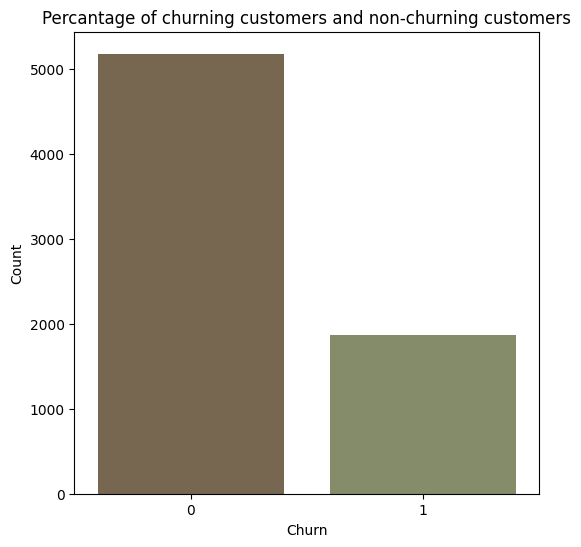

In [29]:
churn_count = df["Churn Value"].value_counts(normalize=True)*100

plt.figure(figsize=(6,6))
ax = sns.barplot(x=churn_count.index, y=df["Churn Value"].value_counts(), palette=fall_rand)

plt.title("Percantage of churning customers and non-churning customers")
plt.ylabel("Count")
plt.xlabel("Churn")

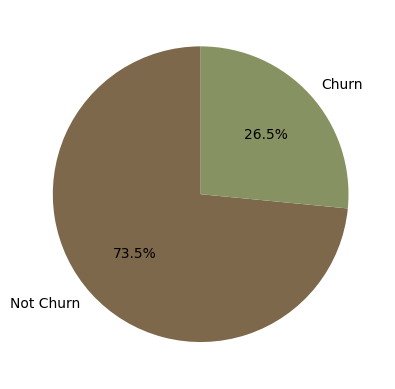

In [30]:
ax = plt.pie(churn_count.values, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', colors=fall_rand, startangle=90)

**Churn value observations**
- Data is imbalanced, with customers who churned being only less than 2000 approximately, while those who did not are over 5000 approximately
- with 26.5% churn while no churn is 73.5%

Text(0.5, 1.0, 'Box plot for Tenure Months and if customer churned or not')

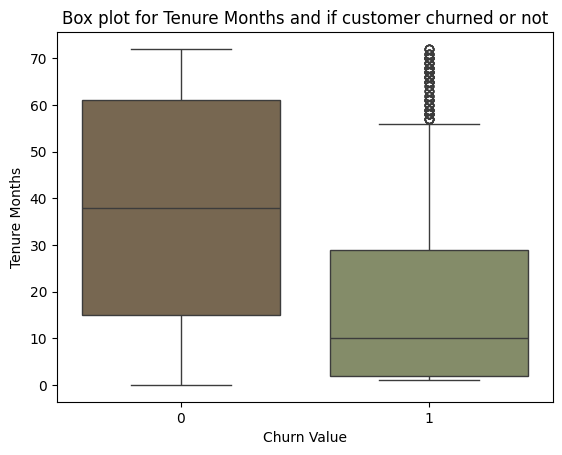

In [31]:
sns.boxplot(x="Churn Value", y="Tenure Months", data=df, palette=fall_rand, whis=1)
plt.title("Box plot for Tenure Months and if customer churned or not")

Text(0.5, 1.0, 'Box plot for monthly charges and if customer churned or not')

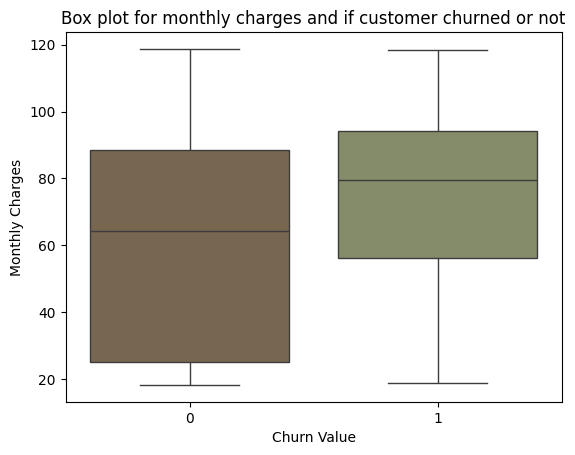

In [32]:
sns.boxplot(x="Churn Value", y="Monthly Charges", data=df, palette=fall_rand, whis=1)
plt.title("Box plot for monthly charges and if customer churned or not")

Text(0.5, 1.0, 'Box plot for CLTV (Customer Life Time Value) and if customer churned or not')

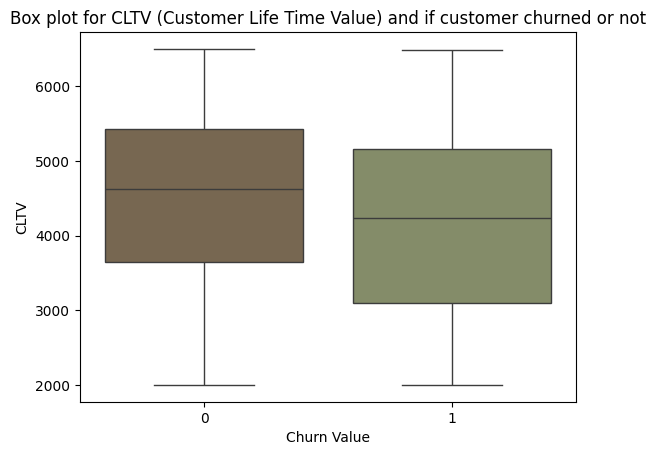

In [33]:
#CLTV

sns.boxplot(x="Churn Value", y="CLTV", data=df, palette=fall_rand, whis=1)
plt.title("Box plot for CLTV (Customer Life Time Value) and if customer churned or not")

**Box plots observations**
- the only feature with outliers is Tenure months with people who churned, which indicated that those who stayed less months in Telco's services had higher chances of churning

<Axes: xlabel='Tenure Months', ylabel='Count'>

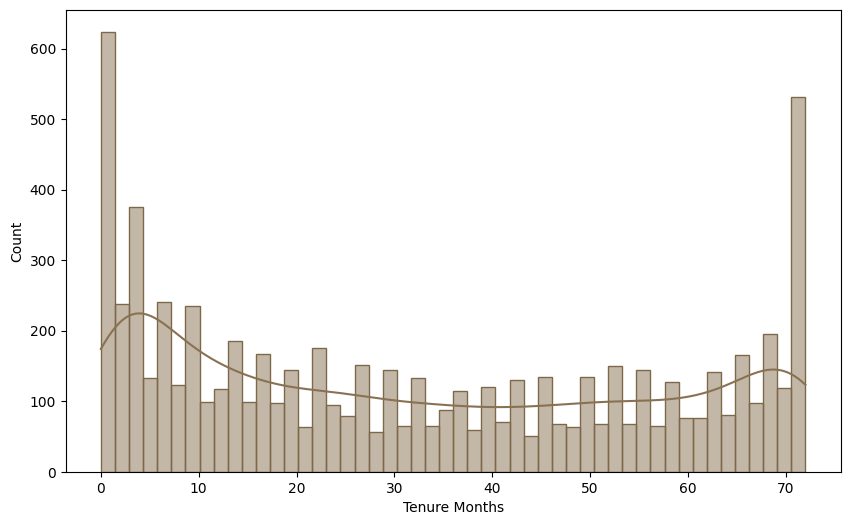

In [34]:
plt.figure(figsize=(10, 6))

skewness = skew(df["Tenure Months"], nan_policy="omit")
sns.histplot(df["Tenure Months"], bins=50, kde=True, color=fall_rand[2], edgecolor=fall_rand[0])

<Axes: xlabel='CLTV', ylabel='Count'>

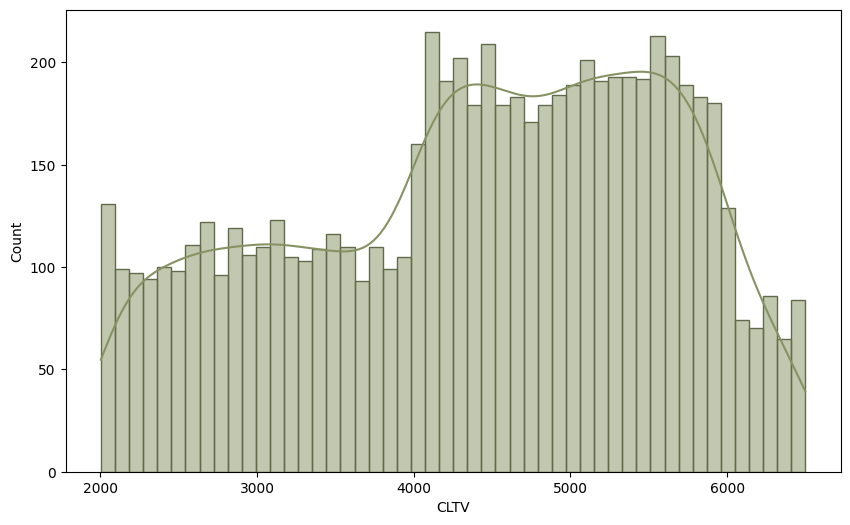

In [35]:
plt.figure(figsize=(10, 6))

skewness = skew(df["CLTV"], nan_policy="omit")
sns.histplot(df["CLTV"], bins=50, kde=True, color=fall_palette[-2], edgecolor=fall_palette[-1])

<Axes: xlabel='Churn Score', ylabel='Count'>

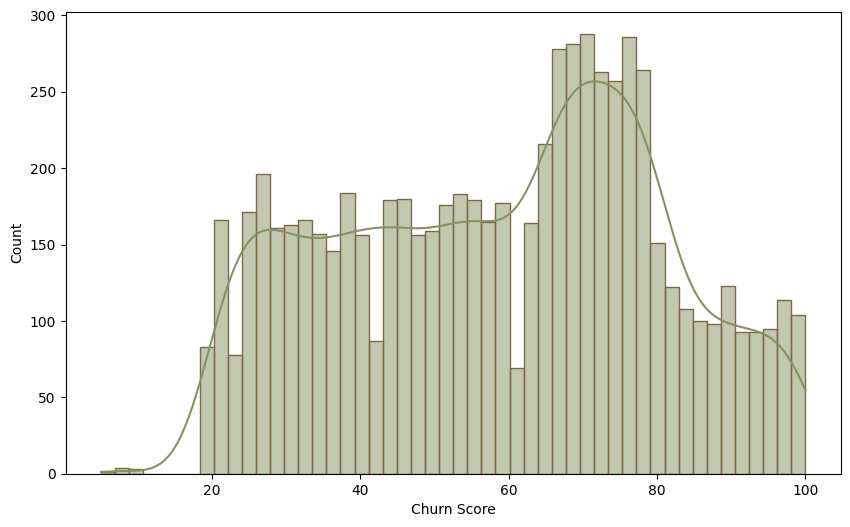

In [36]:
#Churn Score
plt.figure(figsize=(10, 6))

skewness = skew(df["Churn Score"], nan_policy="omit")
sns.histplot(df["Churn Score"], bins=50, kde=True, color=fall_palette[-2], edgecolor=fall_rand[0])

<Axes: xlabel='Monthly Charges', ylabel='Count'>

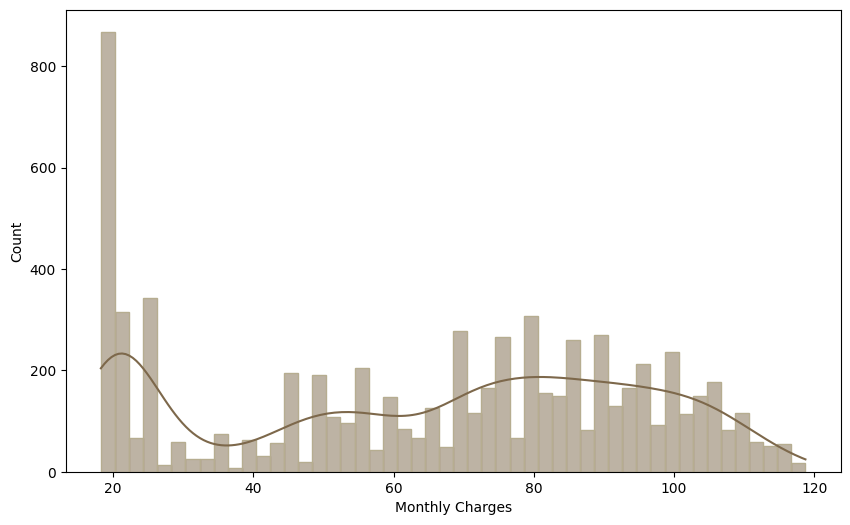

In [37]:
plt.figure(figsize=(10, 6))

skewness = skew(df["Monthly Charges"], nan_policy="omit")
sns.histplot(df["Monthly Charges"], bins=50, kde=True, color=fall_palette[0], edgecolor=fall_rand[-1])

**Histograms' observations**
- Monthly charges is mostly normally distributed except for the first 30
- churn score is the highest in the bracket between 70 to 80 approximately
- CLTV is the highest between 4000 to 6000 value

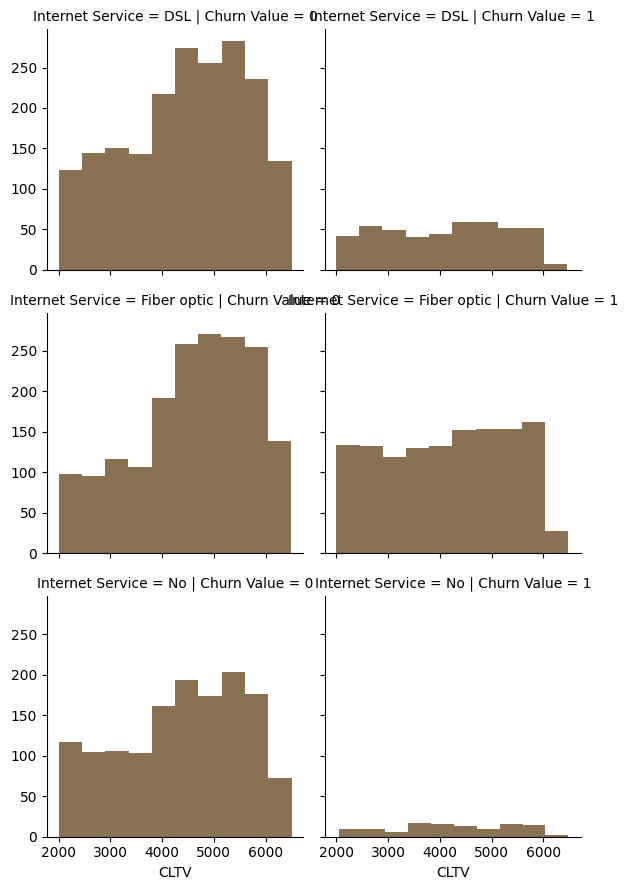

In [38]:
Faregrid = sns.FacetGrid(df, col='Churn Value', row='Internet Service')
Faregrid.map(plt.hist, 'CLTV', color=fall_rand[2])

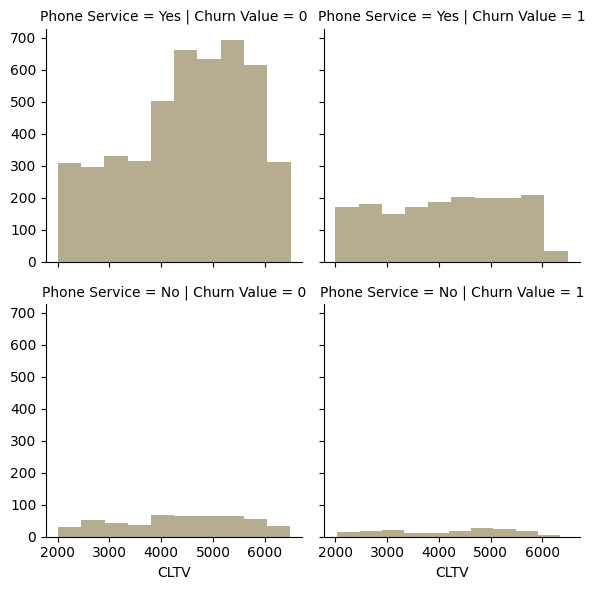

In [39]:
Faregrid = sns.FacetGrid(df, col='Churn Value', row='Phone Service')
Faregrid.map(plt.hist, 'CLTV', color=fall_rand[-1])

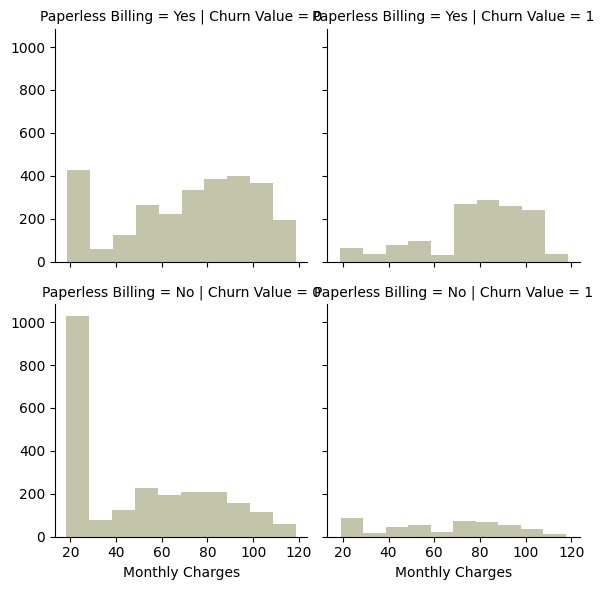

In [40]:
Faregrid = sns.FacetGrid(df, col='Churn Value', row='Paperless Billing')
Faregrid.map(plt.hist, 'Monthly Charges', color=fall_rand[-2])

In [41]:
print(df['Churn Reason'].value_counts().head(20))

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

## Make Preprocessing (Nulls, Duplicates, Outliers)

In [42]:
#total charges is not object, it's numerical feature

df["Total Charges"] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [43]:
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

In [44]:
numerical = df.select_dtypes(exclude="object")
dataInfo(numerical)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Count,int64,[1],1,0,0.000000,0
1,Zip Code,int64,"[92284, 92275, 92268, 90710, 90704, 90660, 90631, 90606, 90602, 90504]",1652,0,0.000000,0
2,Latitude,float64,"[34.159534, 33.28156, 34.201108, 33.798266, 33.391181, 33.989524, 33.940619, 33.976678, 33.972119, 33.867257]",1652,0,0.000000,0
3,Longitude,float64,"[-121.994813, -118.300942, -118.463365, -118.431791, -118.699048, -118.548511, -118.644609, -118.518292, -116.654195, -116.139589]",1651,0,0.000000,0
4,Tenure Months,int64,"[1, 72, 2, 3, 4, 71, 5, 7, 8, 9]",73,0,0.000000,0
5,Monthly Charges,float64,"[20.05, 19.85, 19.9, 19.95, 19.65, 20.0, 19.7, 20.15, 19.55, 20.25]",1585,0,0.000000,0
6,Total Charges,float64,"[20.2, 1397.475, 19.75, 20.05, 19.65, 19.9, 45.3, 19.55, 20.15, 19.45]",6531,0,0.000000,0
7,Churn Value,int64,"[0, 1]",2,0,0.000000,0
8,Churn Score,int64,"[80, 71, 77, 67, 68, 76, 70, 69, 78, 72]",85,0,0.000000,0
9,CLTV,int64,"[5546, 5092, 5137, 4745, 4741, 4369, 5461, 4115, 5527, 5915]",3438,0,0.000000,0


In [45]:
dataInfo(numerical)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Count,int64,[1],1,0,0.000000,0
1,Zip Code,int64,"[92284, 92275, 92268, 90710, 90704, 90660, 90631, 90606, 90602, 90504]",1652,0,0.000000,0
2,Latitude,float64,"[34.159534, 33.28156, 34.201108, 33.798266, 33.391181, 33.989524, 33.940619, 33.976678, 33.972119, 33.867257]",1652,0,0.000000,0
3,Longitude,float64,"[-121.994813, -118.300942, -118.463365, -118.431791, -118.699048, -118.548511, -118.644609, -118.518292, -116.654195, -116.139589]",1651,0,0.000000,0
4,Tenure Months,int64,"[1, 72, 2, 3, 4, 71, 5, 7, 8, 9]",73,0,0.000000,0
5,Monthly Charges,float64,"[20.05, 19.85, 19.9, 19.95, 19.65, 20.0, 19.7, 20.15, 19.55, 20.25]",1585,0,0.000000,0
6,Total Charges,float64,"[20.2, 1397.475, 19.75, 20.05, 19.65, 19.9, 45.3, 19.55, 20.15, 19.45]",6531,0,0.000000,0
7,Churn Value,int64,"[0, 1]",2,0,0.000000,0
8,Churn Score,int64,"[80, 71, 77, 67, 68, 76, 70, 69, 78, 72]",85,0,0.000000,0
9,CLTV,int64,"[5546, 5092, 5137, 4745, 4741, 4369, 5461, 4115, 5527, 5915]",3438,0,0.000000,0


In [46]:
df.drop("CustomerID", inplace=True,axis=1)
df.drop("Count", inplace=True,axis=1)
df.drop("Country", inplace=True, axis=1)
df.drop("State", inplace=True, axis=1)

In [47]:
df.drop("Churn Reason", inplace=True, axis=1)

In [48]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:

        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1

        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)

        df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
        df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])

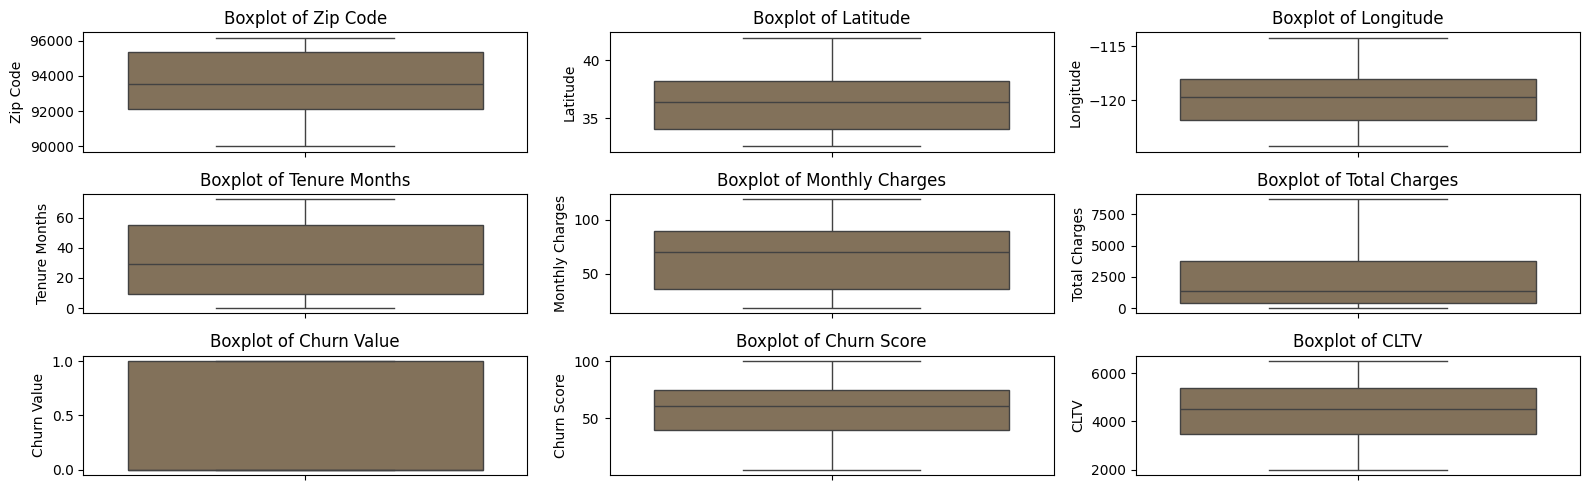

In [49]:
n_cols = len(num_cols)

fig, axes = plt.subplots(3, 3, figsize=(16, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=df,
        y=col,
        ax=axes[i],
        color=fall_rand[2],
        whis=1.5
    )
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


## Feature Engineering & Extraction

**Which features will we create/extract?**
- Churn (normalize all churn features)
- isNew (a new customer <=12)
- averageCharge (average charge over time)
- Contract value (ensuring that time matters)
- Family score = partner + dependants

In [50]:
df['Churn'] = df['Churn Value']

In [51]:
df['Churn'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

In [52]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [53]:
df['IsNew'] = (df['Tenure Months'] <= 12).astype(int)

In [54]:
df['AvgCharge'] = df['Total Charges']/(df['Tenure Months']+1)

In [55]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract_Value'] = df['Contract'].map(contract_mapping)

In [56]:
partnerValue = df['Partner'].map({'Yes':1, 'No':0})
dependentValue = df['Dependents'].map({'Yes':1, 'No':0})

df['familyScore'] = partnerValue + dependentValue

In [57]:
dataInfo(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,City,object,"['Los Angeles', 'San Diego', 'San Jose', 'Sacramento', 'San Francisco', 'Fresno', 'Long Beach', 'Oakland', 'Stockton', 'Bakersfield']",1129,0,0.000000,0
1,Zip Code,float64,"[92284.0, 92275.0, 92268.0, 90710.0, 90704.0, 90660.0, 90631.0, 90606.0, 90602.0, 90504.0]",1652,0,0.000000,0
2,Lat Long,object,"['34.159534, -116.425984', '33.28156, -115.955541', '34.201108, -116.593456', '33.798266, -118.300237', '33.391181, -118.421305', '33.989524, -118.089299', '33.940619, -117.9513', '33.976678, -118.065875', '33.972119, -118.020188', '33.867257, -118.330794']",1652,0,0.000000,0
3,Latitude,float64,"[34.159534, 33.28156, 34.201108, 33.798266, 33.391181, 33.989524, 33.940619, 33.976678, 33.972119, 33.867257]",1652,0,0.000000,0
4,Longitude,float64,"[-121.994813, -118.300942, -118.463365, -118.431791, -118.699048, -118.548511, -118.644609, -118.518292, -116.654195, -116.139589]",1651,0,0.000000,0
5,Gender,object,"['Male', 'Female']",2,0,0.000000,0
6,Senior Citizen,object,"['No', 'Yes']",2,0,0.000000,0
7,Partner,object,"['No', 'Yes']",2,0,0.000000,0
8,Dependents,object,"['No', 'Yes']",2,0,0.000000,0
9,Tenure Months,float64,"[1.0, 72.0, 2.0, 3.0, 4.0, 71.0, 5.0, 7.0, 8.0, 9.0]",73,0,0.000000,0


In [58]:
df.drop(columns=['Churn Label', "Churn Value", "Churn Score"], inplace=True)

In [59]:
#correlation
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(exclude=['object'])

In [60]:
numerical.corr().style.background_gradient(cmap=fall_map)

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn,IsNew,AvgCharge,Contract_Value,familyScore
Zip Code,1.000000,0.895743,-0.784271,0.001041,-0.004596,-0.001237,-0.003562,0.003346,-0.012724,-0.013391,0.004381,0.000491
Latitude,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.010168,0.000886,-0.003384,-0.009226,-0.015212,0.004799,0.004464
Longitude,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.008977,0.000485,0.004594,0.004783,0.012522,-0.011633,-0.002373
Tenure Months,0.001041,-0.001631,-0.001678,1.000000,0.247900,0.825464,0.396406,-0.352229,-0.755067,0.160498,0.671607,0.321723
Monthly Charges,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.650864,0.098693,0.193356,-0.193180,0.451343,-0.074195,-0.016254
Total Charges,-0.001237,-0.010168,0.008977,0.825464,0.650864,1.000000,0.341723,-0.199037,-0.592253,0.368581,0.448564,0.226262
CLTV,-0.003562,0.000886,0.000485,0.396406,0.098693,0.341723,1.000000,-0.127463,-0.206432,0.051774,0.266598,0.122631
Churn,0.003346,-0.003384,0.004594,-0.352229,0.193356,-0.199037,-0.127463,1.000000,0.317580,0.014873,-0.396713,-0.236176
IsNew,-0.012724,-0.009226,0.004783,-0.755067,-0.193180,-0.592253,-0.206432,0.317580,1.000000,-0.137733,-0.459913,-0.261791
AvgCharge,-0.013391,-0.015212,0.012522,0.160498,0.451343,0.368581,0.051774,0.014873,-0.137733,1.000000,0.073247,0.062402


<Axes: >

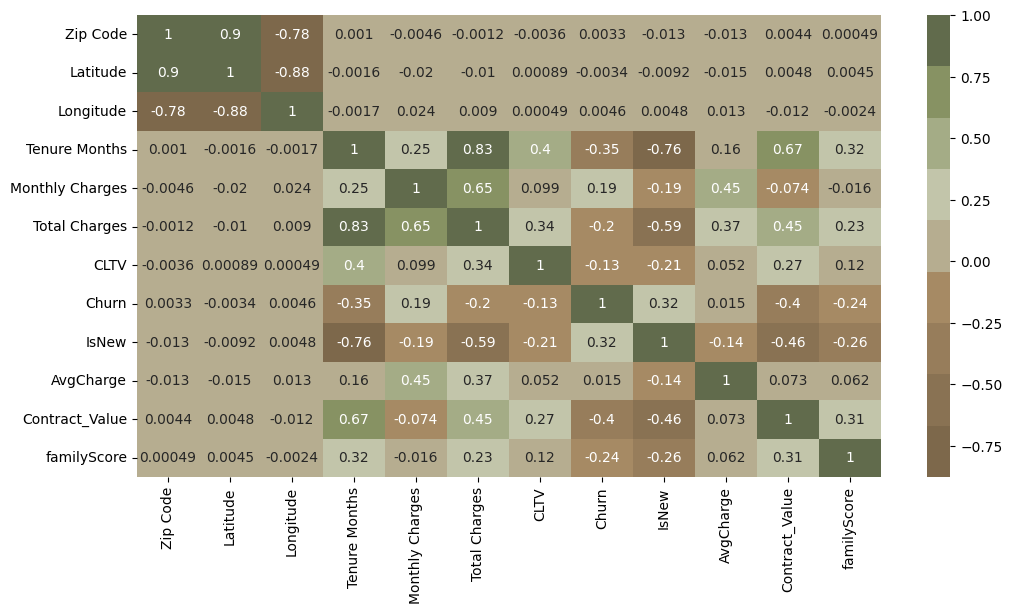

In [61]:
plt.figure(figsize=(12, 6))
sns.heatmap(numerical.corr(), cmap=fall_map, annot=True)

In [62]:
categorical = df.select_dtypes(include="object")

for cat in categorical:
  table = pd.crosstab(df[cat], df['Churn'])
  chi2, p, dof, expected = chi2_contingency(table)

  print("--------")
  print("name: ", cat)
  print("Chi2:", chi2)
  print("p-value:", p)

--------
name:  City
Chi2: 1233.567218891576
p-value: 0.014975403740977845
--------
name:  Lat Long
Chi2: 1745.965513883572
p-value: 0.0511798446807155
--------
name:  Gender
Chi2: 0.4840828822091383
p-value: 0.48657873605618596
--------
name:  Senior Citizen
Chi2: 159.42630036838742
p-value: 1.510066805092378e-36
--------
name:  Partner
Chi2: 158.7333820309922
p-value: 2.1399113440759935e-36
--------
name:  Dependents
Chi2: 433.7343787644573
p-value: 2.5009723998553557e-96
--------
name:  Phone Service
Chi2: 0.9150329892546948
p-value: 0.3387825358066928
--------
name:  Multiple Lines
Chi2: 11.33044148319756
p-value: 0.0034643829548773
--------
name:  Internet Service
Chi2: 732.309589667794
p-value: 9.571788222840544e-160
--------
name:  Online Security
Chi2: 849.9989679615965
p-value: 2.661149635176552e-185
--------
name:  Online Backup
Chi2: 601.812790113409
p-value: 2.0797592160864276e-131
--------
name:  Device Protection
Chi2: 558.419369407389
p-value: 5.505219496457244e-122
----

In [63]:
df.drop(columns=['Gender', 'AvgCharge'], inplace=True)

In [64]:
df.drop(columns=['Zip Code'], inplace=True)

# Split Data

In [65]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [67]:
y_train.value_counts()

,count
Churn,
0,4165
1,1469


In [68]:
x_categorical = [i for i, col in enumerate(x_train.columns) if x_train[col].dtype == 'object' or x_train[col].dtype.name == 'category']

In [69]:
#oversampling and undersampling hybridly
#oversample to 60%, undersample to 80%
from imblearn.pipeline import Pipeline

sampling_pipeline = Pipeline([
    ('smotenc', SMOTENC(categorical_features=x_categorical, sampling_strategy=0.6)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.8))
])

In [70]:
x_train_samp, y_train_samp = sampling_pipeline.fit_resample(x_train, y_train)

In [71]:
y_train.value_counts()  #sum: 5634

,count
Churn,
0,4165
1,1469


In [72]:
y_train_samp.value_counts()  #sum: 5622

,count
Churn,
0,3123
1,2499


In [73]:
x_train.shape

(5634, 26)

In [74]:
y_train.shape

(5634,)

In [75]:
x_train_samp.shape

(5622, 26)

## Encoding & Scaling (if needed)

In [76]:
scaler =  MinMaxScaler().set_output(transform="pandas")
x_res_numerical = x_train_samp.select_dtypes(exclude='object')
x_test_numerical = x_test.select_dtypes(exclude='object')


x_train_samp[x_res_numerical.columns.to_list()] = scaler.fit_transform(x_train_samp[x_res_numerical.columns.to_list()])
x_test[x_test_numerical.columns.to_list()] = scaler.transform(x_test[x_test_numerical.columns.to_list()])

In [77]:
x_res_categorical = x_train_samp.select_dtypes(include='object')

dataInfo(x_res_categorical)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,City,object,"['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Fresno', 'Long Beach', 'Stockton', 'Oakland', 'Glendale']",1116,0,0.000000,37
1,Lat Long,object,"['38.921333, -120.897718', '34.066367, -118.309868', '33.537646, -116.291089', '32.649787, -116.2237', '41.5837, -122.935922', '33.391181, -118.421305', '32.99356, -117.207121', '34.059281, -118.30742', '40.825486, -124.049485', '41.171578, -120.913161']",1633,0,0.000000,37
2,Senior Citizen,object,"['No', 'Yes']",2,0,0.000000,37
3,Partner,object,"['No', 'Yes']",2,0,0.000000,37
4,Dependents,object,"['No', 'Yes']",2,0,0.000000,37
5,Phone Service,object,"['Yes', 'No']",2,0,0.000000,37
6,Multiple Lines,object,"['No', 'Yes', 'No phone service']",3,0,0.000000,37
7,Internet Service,object,"['Fiber optic', 'DSL', 'No']",3,0,0.000000,37
8,Online Security,object,"['No', 'Yes', 'No internet service']",3,0,0.000000,37
9,Online Backup,object,"['No', 'Yes', 'No internet service']",3,0,0.000000,37


In [78]:
#different encoding for different things

binary_mapping = {'No': 0, 'Yes': 1}

yes_no_columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

for col in yes_no_columns:
    x_train_samp[col] = x_train_samp[col].map(binary_mapping)
    x_test[col] = x_test[col].map(binary_mapping)

In [79]:
categorical_one_hot = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

ohe = OneHotEncoder(cols=categorical_one_hot, drop_invariant=True, use_cat_names=True)

x_train_samp_ohe = ohe.fit_transform(x_train_samp[categorical_one_hot])

x_test_ohe = ohe.transform(x_test[categorical_one_hot])

In [80]:
te = TargetEncoder(cols=['City'])

x_train_samp['City'] = te.fit_transform(x_train_samp['City'], y_train_samp)
x_test['City'] = te.transform(x_test['City'])

te1 = TargetEncoder(cols=['Lat Long'])

x_train_samp['Lat Long'] = te1.fit_transform(x_train_samp['Lat Long'], y_train_samp)
x_test['Lat Long'] = te1.transform(x_test['Lat Long'])

In [81]:
#ohe cont.

x_train_samp_final = pd.concat([x_train_samp.drop(columns=categorical_one_hot), x_train_samp_ohe], axis=1)
x_test_final = pd.concat([x_test.drop(columns=categorical_one_hot), x_test_ohe], axis=1)

In [82]:
x_train_samp_final.head().style.background_gradient(cmap=fall_map)

,City,Lat Long,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,CLTV,IsNew,Contract_Value,familyScore,Multiple Lines_No,Multiple Lines_Yes,Multiple Lines_No phone service,Internet Service_No,Internet Service_DSL,Internet Service_Fiber optic,Online Security_No internet service,Online Security_No,Online Security_Yes,Online Backup_No internet service,Online Backup_No,Online Backup_Yes,Device Protection_No internet service,Device Protection_No,Device Protection_Yes,Tech Support_No internet service,Tech Support_No,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_No,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_No,Streaming Movies_Yes,Contract_Month-to-month,Contract_Two year,Contract_One year,Payment Method_Mailed check,Payment Method_Electronic check,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic)
2620,0.337617,0.427332,0.128268,0.673954,0,0,0,0.055556,1,0,0.017465,0.007576,0.785412,1.000000,0.000000,0.000000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3178,0.478820,0.509355,0.645344,0.294145,0,0,0,0.111111,1,0,0.259980,0.040440,0.646209,1.000000,0.000000,0.000000,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1596,0.411831,0.411831,0.171466,0.617687,1,0,0,0.777778,1,0,0.861776,0.671882,0.694908,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0
804,0.435874,0.369835,0.533307,0.231171,0,0,0,0.930556,1,0,0.470559,0.501122,0.896598,0.000000,1.000000,0.000000,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3000,0.402532,0.455482,0.141393,0.602951,0,0,0,0.041667,1,1,0.893713,0.034589,0.811652,1.000000,0.000000,0.000000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0


In [83]:
dataInfo(x_train_samp_final)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,City,float64,"[0.3758433480178311, 0.4538260874845634, 0.49420849420642043, 0.42733176971234266, 0.3814504071173392, 0.3698352800515256, 0.4118306837680445, 0.4788201914068542, 0.4958214912010822, 0.4728702228586832]",115,0,0.000000,0
1,Lat Long,float64,"[0.3758433480178311, 0.4538260874845634, 0.42733176971234266, 0.3814504071173392, 0.4728702228586832, 0.4958214912010822, 0.3698352800515256, 0.4788201914068542, 0.4363851180974119, 0.4118306837680445]",43,0,0.000000,0
2,Latitude,float64,"[0.022269226185559265, 0.1376392564174287, 0.1605812232845243, 0.16329493672272166, 0.05302308591296079, 0.1042080418664133, 0.009988944642308706, 0.046536049938451285, 0.15767678658737116, 0.12105430626859759]",2663,0,0.000000,0
3,Longitude,float64,"[0.583802436590064, 0.7053993625742212, 0.8094349778517458, 0.6242289264123126, 0.5662388505640479, 0.6241602711231007, 0.5807719090256089, 0.7459874000726714, 0.7018124699571278, 0.717586863532576]",2662,0,0.000000,0
4,Senior Citizen,int64,"[0, 1]",2,0,0.000000,0
5,Partner,int64,"[0, 1]",2,0,0.000000,0
6,Dependents,int64,"[0, 1]",2,0,0.000000,0
7,Tenure Months,float64,"[0.013888888888888888, 1.0, 0.027777777777777776, 0.041666666666666664, 0.05555555555555555, 0.06944444444444445, 0.986111111111111, 0.09722222222222221, 0.1111111111111111, 0.1388888888888889]",805,0,0.000000,0
8,Phone Service,int64,"[1, 0]",2,0,0.000000,0
9,Paperless Billing,int64,"[1, 0]",2,0,0.000000,0


In [84]:
x_train_samp_final.shape

(5622, 47)

## Model Training

In [85]:
model = Sequential([
    Input(shape=(47,)),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
history = model.fit(x_train_samp_final, y_train_samp, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6773 - loss: 0.5620 - val_accuracy: 0.8613 - val_loss: 0.6197
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7844 - loss: 0.4557 - val_accuracy: 0.8684 - val_loss: 0.5065
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7960 - loss: 0.4337 - val_accuracy: 0.8436 - val_loss: 0.4619
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7956 - loss: 0.4330 - val_accuracy: 0.7636 - val_loss: 0.5573
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4213 - val_accuracy: 0.8133 - val_loss: 0.4931
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4200 - val_accuracy: 0.7760 - val_loss: 0.5362
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8039 - loss: 0.4029 - val_accuracy: 0.7547 - val_loss: 0.5408
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8082 - loss: 0.4082 - val_accuracy: 0.

## Evaluate Model in Training, Testing

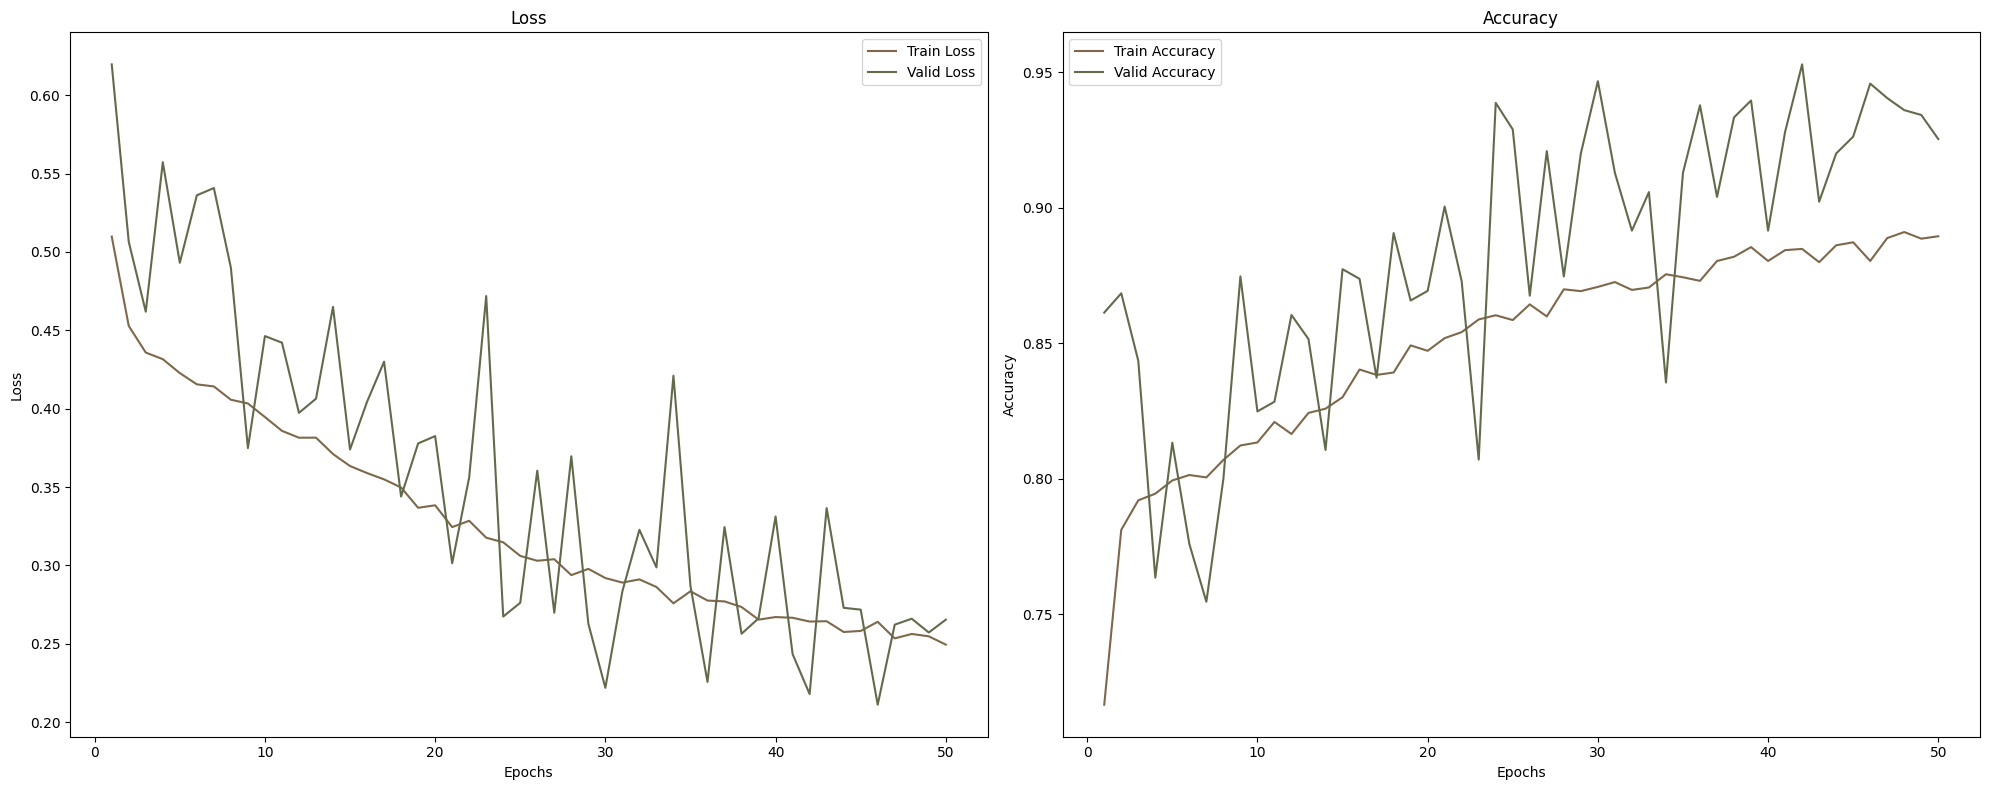

In [89]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss', color=fall_palette[0])
plt.plot(epochs, val_loss, 'g', label='Valid Loss', color=fall_palette[-1])
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy', color=fall_palette[0])
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy', color=fall_palette[-1])
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [91]:
y_pred = model.predict(x_test_final)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1009
           1       0.58      0.50      0.54       400

    accuracy                           0.75      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409



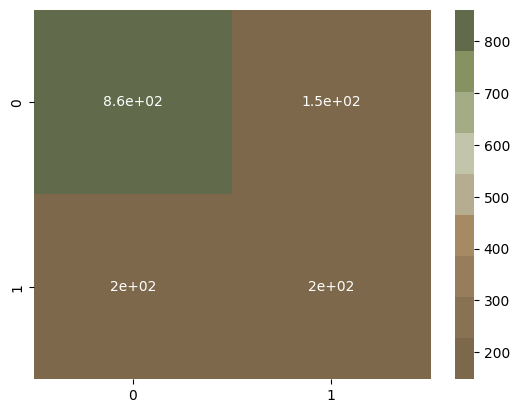

In [92]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap=fall_map)
plt.show()

In [93]:
model.save('my_model.keras')